# Simulation du jeux de LIDO simplifié


# ferielremadi 2lM2


## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
#on va calculer combient de fois le jour va lancé le dé pour sortir de prisson pour arriver a la sible 
def Roll(): #on lance le dé une seul fois pour obtenir un nombre entre 1 et 6
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

2

### Compléter le code et commenter

In [4]:
A=0 #position initiale 
NA=0 #nombre de cout 
S=10 #taille
c=0
temp=Roll() #Temp va prendre le lancement de dé 
NA+=1 
while temp!=6: #Au cours du lancement si temp prend la valeur qui est different de 6 en va relancer une autrefois jusqu'à on obtient 6  
    temp=Roll()
    NA+=1 #et la on va incrimenter le nbr de cout a chaque fois en lance le dé
    print(NA,temp)
A=1
print('Sortie de la prisson aprés {} coup'.format(NA))
while (A<S) :#Tandque la  position est inférieure à taille de jeux
    temp=Roll() #on lance le dé
    if temp+A<S: #si la lancement de dé + notre postion est encore inferieur a celle de S  
        NA+=1 #on ecrit nombre de cout 
        A+=temp #et puis on avance 
        print(NA,temp,A)
    elif temp+A>S : #et si la lancement de dé + notre postion depasse la taille de  S 
        NA+=1 #on ecrit seulement nombre de cout
        print(NA,temp,A)
    else : 
        A=S #si non si A est egale a la taille S  
        NA+=1 #on ecrit le nbr de cout et on sorte de jeux 
        print(NA,temp,A)

2 5
3 1
4 2
5 2
6 3
7 3
8 4
9 1
10 5
11 5
12 4
13 2
14 5
15 2
16 1
17 6
Sortie de la prisson aprés 17 coup
18 5 6
19 2 8
20 6 8
21 5 8
22 4 8
23 2 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(S):
    A=0 
    NA=0
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    A=1
    while (A<S) :
        temp=Roll()
        if temp+A<S:
            NA+=1
            A+=temp
        elif temp+A>S :
            NA+=1
        else : 
            A=S
            NA+=1
    return NA #la on va simuler le nombre de cout on va voir combient de fois je lance le dé pour que je fini le jeux 
   

In [6]:
sim(20)

5

### Simulation de $10^5$  scénario 

In [7]:
L=[sim(30) for i in range (10000)] #on va faire la simulation pour 10000 fois  
Moy=sum(L)/10000 #pour faire la moyenne 
print ('estimation de la moyenne de X_30={}'.format(Moy)) 

estimation de la moyenne de X_30=19.0746


In [8]:
X=list(range(10,20)) #on va prendre la liste de x (abssices qui est entre 10 et 19)
X
y=[sum([sim(u)for i in range(10000)])/10000 for u in X] #et l'axe des ordonnées qui est la moyenne de chaque simulation 

In [9]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


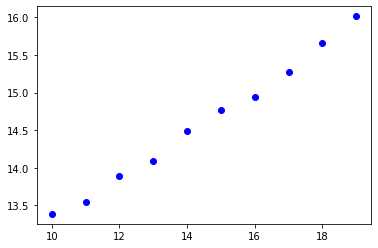

In [11]:
plt.plot(X,y,'ob')
plt.show() #puis on va afficher notre courbe 

In [12]:
from scipy import stats #on va calculer l'équation de cette courbe 
import numpy as py 
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)  

In [13]:
slope #slope va donner pente a 

0.29211454545454546

In [14]:
intercept
#intercept donne b (eq sous forme de aX+b)

10.369769090909092

In [15]:
yy=[slope *u +intercept for u in X]

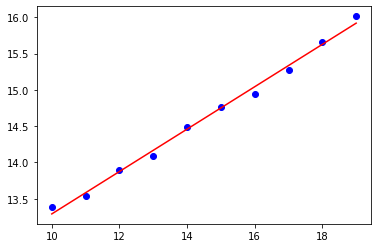

In [16]:
plt.plot(X,y,'ob',X,yy,'-r')#on va dessiner une droite 

E(X_n)-=0.292114*n+10.3697 

In [ ]:
#et voila mon equation 